In [1]:
import numpy as np
import pandas as pd
import nilearn.image
import nilearn.plotting
import scipy.io
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWar

In [2]:
subj_list_GA = ['GA01', 'GA02', 'GA05', 'GA07', 'GA08', 
                'GA11', 'GA12', 'GA13', 'GA14', 'GA15', 
                'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 
                'GA26', 'GA27', 'GA28', 'GA29', 'GA30', 
                'GA31', 'GA32', 'GA33', 'GA34', 'GA35',
                'GA36', 'GA37', 'GA38', 'GA42', 'GA44']

subj_list_GB = ['GB01', 'GB02', 'GB05', 'GB07', 'GB08', 
                'GB11', 'GB12', 'GB13', 'GB14', 'GB15', 
                'GB18', 'GB19', 'GB20', 'GB21', 'GB23', 
                'GB26', 'GB27', 'GB28', 'GB29', 'GB30', 
                'GB31', 'GB32', 'GB33', 'GB34', 'GB35',
                'GB36', 'GB37', 'GB38', 'GB42', 'GB44']

In [3]:
prac_data = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/mrew_errR_30_run1to3_20190626.mat')
prac_data.keys()

mrew = {}

for subj in subj_list_GA:
    mrew[subj, 'practice'] = prac_data['%s_mrew_all' % subj][0]

In [4]:
unprac_data = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/mrew_errR_30_run4to6_20190626.mat')
unprac_data.keys()

for i, subj in enumerate(subj_list_GA):
    mrew[subj, 'unpractice'] = unprac_data['mrew_run4to6'][i]

In [6]:
mrew['GA01', 'practice'].shape

(168,)

In [7]:
168/7

24.0

In [8]:
mrew['GA01', 'unpractice'].shape

(48,)

In [5]:
result = {}

for subj in subj_list_GA:
    result[subj, 'trained', 'early'] = mrew[subj, 'practice'][23] - mrew[subj, 'practice'][0]
    result[subj, 'untrained', 'early'] = mrew[subj, 'unpractice'][23] - mrew[subj, 'unpractice'][0]
    result[subj, 'trained', 'late'] = mrew[subj, 'practice'][47] - mrew[subj, 'practice'][24]
    result[subj, 'untrained', 'late'] = mrew[subj, 'unpractice'][47] - mrew[subj, 'unpractice'][24]

In [6]:
result

{('GA01', 'trained', 'early'): 0.2861111111111111,
 ('GA01', 'untrained', 'early'): 0.09,
 ('GA01', 'trained', 'late'): 0.4636111111111111,
 ('GA01', 'untrained', 'late'): 0.49777777777777776,
 ('GA02', 'trained', 'early'): 0.25111111111111106,
 ('GA02', 'untrained', 'early'): 0.4027777777777778,
 ('GA02', 'trained', 'late'): 0.3230555555555556,
 ('GA02', 'untrained', 'late'): 0.5013888888888889,
 ('GA05', 'trained', 'early'): 0.5808333333333333,
 ('GA05', 'untrained', 'early'): 0.2758333333333333,
 ('GA05', 'trained', 'late'): 0.6216666666666666,
 ('GA05', 'untrained', 'late'): 0.3936111111111111,
 ('GA07', 'trained', 'early'): 0.2619444444444444,
 ('GA07', 'untrained', 'early'): 0.40222222222222215,
 ('GA07', 'trained', 'late'): 0.38,
 ('GA07', 'untrained', 'late'): 0.538888888888889,
 ('GA08', 'trained', 'early'): 0.19777777777777777,
 ('GA08', 'untrained', 'early'): 0.43999999999999995,
 ('GA08', 'trained', 'late'): 0.2597222222222222,
 ('GA08', 'untrained', 'late'): 0.256944444444

In [7]:
# in Early

scipy.stats.wilcoxon([result[subj, 'trained', 'early'] for subj in subj_list_GA],
                      [result[subj, 'untrained', 'early'] for subj in subj_list_GA])

WilcoxonResult(statistic=170.0, pvalue=0.198610209945546)

In [8]:
# in Late

scipy.stats.wilcoxon([result[subj, 'trained', 'late'] for subj in subj_list_GA],
                      [result[subj, 'untrained', 'late'] for subj in subj_list_GA])

WilcoxonResult(statistic=220.0, pvalue=0.7970983030067952)

In [9]:
# Relearning

scipy.stats.wilcoxon([result[subj, 'untrained', 'early'] for subj in subj_list_GA],
                      [result[subj, 'untrained', 'late'] for subj in subj_list_GA])

WilcoxonResult(statistic=86.0, pvalue=0.002584559206552009)

In [10]:
# Relearning

scipy.stats.wilcoxon([result[subj, 'trained', 'early'] for subj in subj_list_GA],
                      [result[subj, 'trained', 'late'] for subj in subj_list_GA])

WilcoxonResult(statistic=69.0, pvalue=0.0007712173652095513)

In [11]:
datas = {(subj, 'Trained', i): mrew[subj, 'practice'][i] for subj in subj_list_GA for i in range(48)}
datas.update({(subj, 'Untrained', i): mrew[subj, 'unpractice'][i] for subj in subj_list_GA for i in range(48)})

df = pd.DataFrame.from_dict(datas, 'index', columns=['Amount of learning'])

In [12]:
df.tail()

,Amount of learning
"(GA44, Untrained, 43)",0.166667
"(GA44, Untrained, 44)",0.279444
"(GA44, Untrained, 45)",0.197500
"(GA44, Untrained, 46)",0.203611
"(GA44, Untrained, 47)",0.397778


In [13]:
df['mapping'] = [a for _, a, _ in df.index]
df['subject'] = [a for a, _, _ in df.index]
df['time'] = [a for _, _, a in df.index]

In [14]:
df.head()

,Amount of learning,mapping,subject,time
"(GA01, Trained, 0)",0.225833,Trained,GA01,0
"(GA01, Trained, 1)",0.221389,Trained,GA01,1
"(GA01, Trained, 2)",0.370833,Trained,GA01,2
"(GA01, Trained, 3)",0.316389,Trained,GA01,3
"(GA01, Trained, 4)",0.341389,Trained,GA01,4


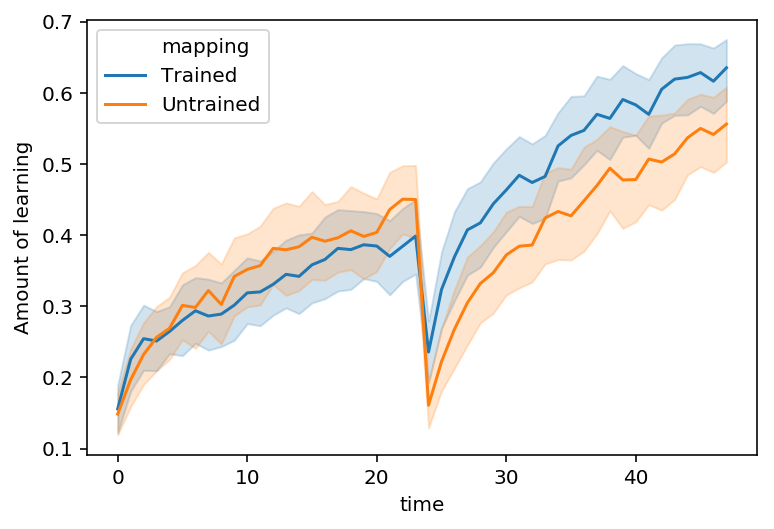

In [15]:
sns.lineplot(x="time", y='Amount of learning',
             hue="mapping",
             data=df)

# Amount of Learning Visualization

In [19]:
datas = {(subj, 'early-trained (fMRI1)', i): mrew[subj, 'practice'][i] - mrew[subj, 'practice'][0] 
         for subj in subj_list_GA for i in range(24)}
datas.update({(subj, 'early-untrained (fMRI1)', i): mrew[subj, 'unpractice'][i] - mrew[subj, 'unpractice'][0]
              for subj in subj_list_GA for i in range(24)})

df = pd.DataFrame.from_dict(datas, 'index', columns=['Amount of learning'])

In [20]:
df['mapping'] = [a for _, a, _ in df.index]
df['subject'] = [a for a, _, _ in df.index]
df['block'] = [a for _, _, a in df.index]

In [21]:
df.head()

,Amount of learning,mapping,subject,block
"(GA01, early-trained (fMRI1), 0)",0.000000,early-trained (fMRI1),GA01,0
"(GA01, early-trained (fMRI1), 1)",-0.004444,early-trained (fMRI1),GA01,1
"(GA01, early-trained (fMRI1), 2)",0.145000,early-trained (fMRI1),GA01,2
"(GA01, early-trained (fMRI1), 3)",0.090556,early-trained (fMRI1),GA01,3
"(GA01, early-trained (fMRI1), 4)",0.115556,early-trained (fMRI1),GA01,4


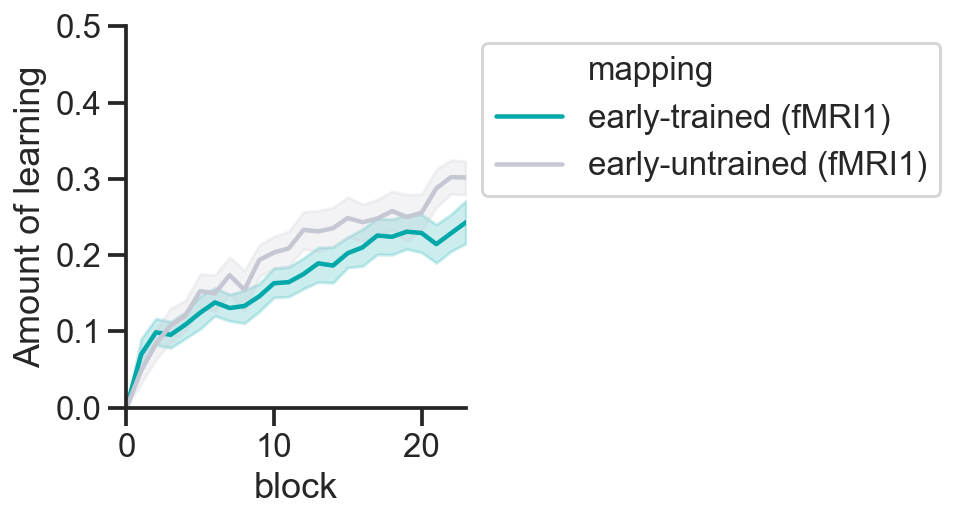

In [22]:
sns.set(style="ticks", context='talk')
palette = ['#00A8AA', '#C5C7D2']

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(x="block", y='Amount of learning',
             hue="mapping", ci=68,
             data=df, palette=palette)

plt.ylim(0, 0.5)
plt.xlim(0, 23)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

sns.despine()

plt.tight_layout()
fig.savefig('/Users/eyshin/Desktop/20200518_transfer-learning_early.png', dpi=600)

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


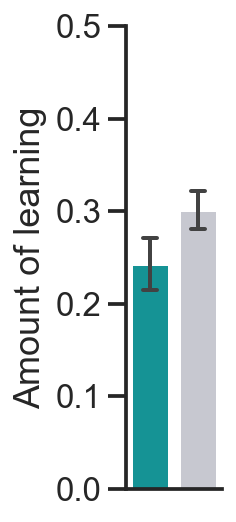

In [23]:
temp_df = df[df['block'] == 23]
temp_df['mapping'] = ['  Untrained' if 'untrained' in mapping else 'Trained  ' for mapping in temp_df['mapping']]

fig, ax = plt.subplots(figsize=(2, 4))

ax = sns.barplot(data=temp_df, x='mapping', y='Amount of learning', palette=palette, capsize=0.3, errwidth=2, ci=68)
plt.ylim(0, 0.5)
ax.get_xaxis().set_visible(False)
sns.despine()

plt.tight_layout()
fig.savefig('/Users/eyshin/Desktop/20200518_transfer-learning_late_early.png', dpi=600)

In [24]:
datas = {(subj, 'late-trained (behav1)', i): mrew[subj, 'practice'][i] - mrew[subj, 'practice'][24] 
         for subj in subj_list_GA for i in range(24, 48)}
datas.update({(subj, 'late-untrained (fMRI2)', i): mrew[subj, 'unpractice'][i] - mrew[subj, 'unpractice'][24]
              for subj in subj_list_GA for i in range(24, 48)})

df = pd.DataFrame.from_dict(datas, 'index', columns=['Amount of learning'])

In [25]:
df['mapping'] = [a for _, a, _ in df.index]
df['subject'] = [a for a, _, _ in df.index]
df['block'] = [a-24 for _, _, a in df.index]

In [26]:
df.head()

,Amount of learning,mapping,subject,block
"(GA01, late-trained (behav1), 24)",0.000000,late-trained (behav1),GA01,0
"(GA01, late-trained (behav1), 25)",-0.028889,late-trained (behav1),GA01,1
"(GA01, late-trained (behav1), 26)",0.158056,late-trained (behav1),GA01,2
"(GA01, late-trained (behav1), 27)",0.112222,late-trained (behav1),GA01,3
"(GA01, late-trained (behav1), 28)",0.193056,late-trained (behav1),GA01,4


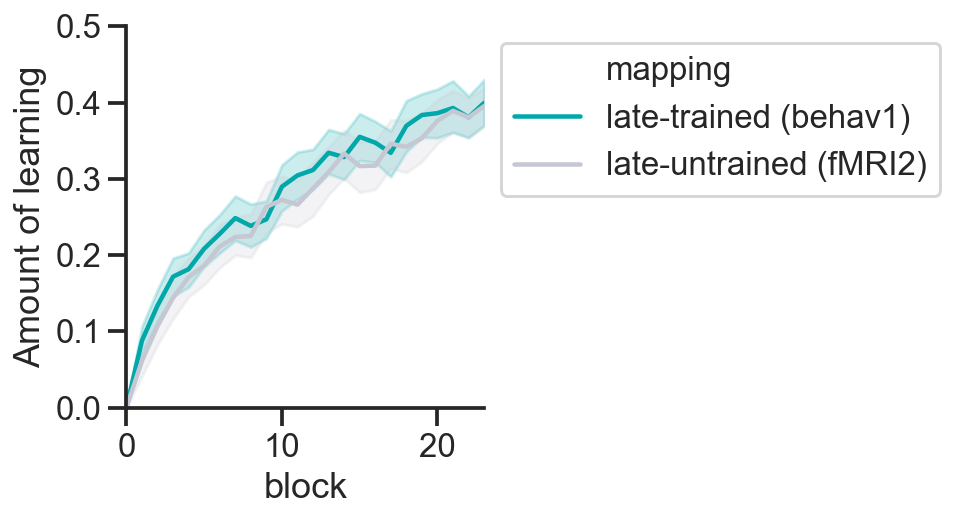

In [27]:
sns.set(style="ticks", context='talk')
palette = ['#00A8AA', '#C5C7D2']

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(x="block", y='Amount of learning',
             hue="mapping", ci=68,
             data=df, palette=palette)

plt.ylim(0, 0.5)
plt.xlim(0, 23)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
sns.despine()

plt.tight_layout()
fig.savefig('/Users/eyshin/Desktop/20200518_transfer-learning_late.png', dpi=600)

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


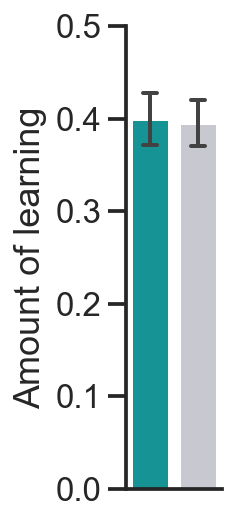

In [28]:
temp_df = df[df['block'] == 23]
temp_df['mapping'] = ['  Untrained' if 'untrained' in mapping else 'Trained  ' for mapping in temp_df['mapping']]

fig, ax = plt.subplots(figsize=(2, 4))

ax = sns.barplot(data=temp_df, x='mapping', y='Amount of learning', palette=palette, capsize=0.3, errwidth=2, ci=68)
plt.ylim(0, 0.5)
ax.get_xaxis().set_visible(False)
sns.despine()

plt.tight_layout()
fig.savefig('/Users/eyshin/Desktop/20200518_transfer-learning_late_last.png', dpi=600)